In [2]:
# import annotation
from scSecretome.annot import *
# import annotation
from scSecretome.sc import *
import pandas as pd
from os import *


scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.3 scipy==1.3.1 pandas==0.25.2 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


# A Cellular Taxonomy of the Bone Marrow Stroma in Homeostasis and Leukemia

In [17]:
bary_list = listdir('/home/hsher/mice_stroma/')
bary_list = [i for i in bary_list if 'std' in i] # steady state bone marrow and bone

In [33]:
bary_list

['GSM3674225_std2',
 'GSM3674224_std1',
 'GSM3674228_std5',
 'GSM3674227_std4',
 'GSM3674226_std3',
 'GSM3674229_std6']

In [34]:
def filter_bary(fname):
    
    adata =  sc.read_10x_mtx('/home/hsher/mice_stroma/{0}'.format(fname), cache = True)
    # adapt original threshold
    sc.pp.filter_cells(adata, min_counts = 500)
    
    # log
    sc.pp.log1p(adata) 
    
    return(adata)

# filter all sample
all_bary = [filter_bary(b) for b in bary_list]

... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
filtered out 2284 cells that haveless than 500 counts
... writing an h5ad cache file to speedup reading next time
filtered out 1164 cells that haveless than 500 counts


In [35]:
# concatenate
concat_bary = all_bary[0].concatenate(all_bary[1:])

In [36]:
# since is UMI data, need not to normalize
sc.pp.log1p(concat_bary) 
sc.pp.highly_variable_genes(concat_bary)
sc.tl.pca(concat_bary, svd_solver='arpack')

# compute neibors for PC
sc.pp.neighbors(concat_bary, n_neighbors=4, n_pcs=40) # wolock as slightly different params
    
# compute umap
sc.tl.umap(concat_bary) 
    
# compute louvain cluster
sc.tl.louvain(concat_bary)

extracting highly variable genes
    finished (0:00:05)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:13)
computing neighbors
    using 'X_pca' with n_pcs = 40


/home/hsher/miniconda3/envs/scanpy/lib/python3.6/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../miniconda3/envs/scanpy/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/hsher/miniconda3/envs/scanpy/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../miniconda3/envs/scanpy/lib/p

    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:09)
computing UMAP


/home/hsher/miniconda3/envs/scanpy/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:29)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 47 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:01)


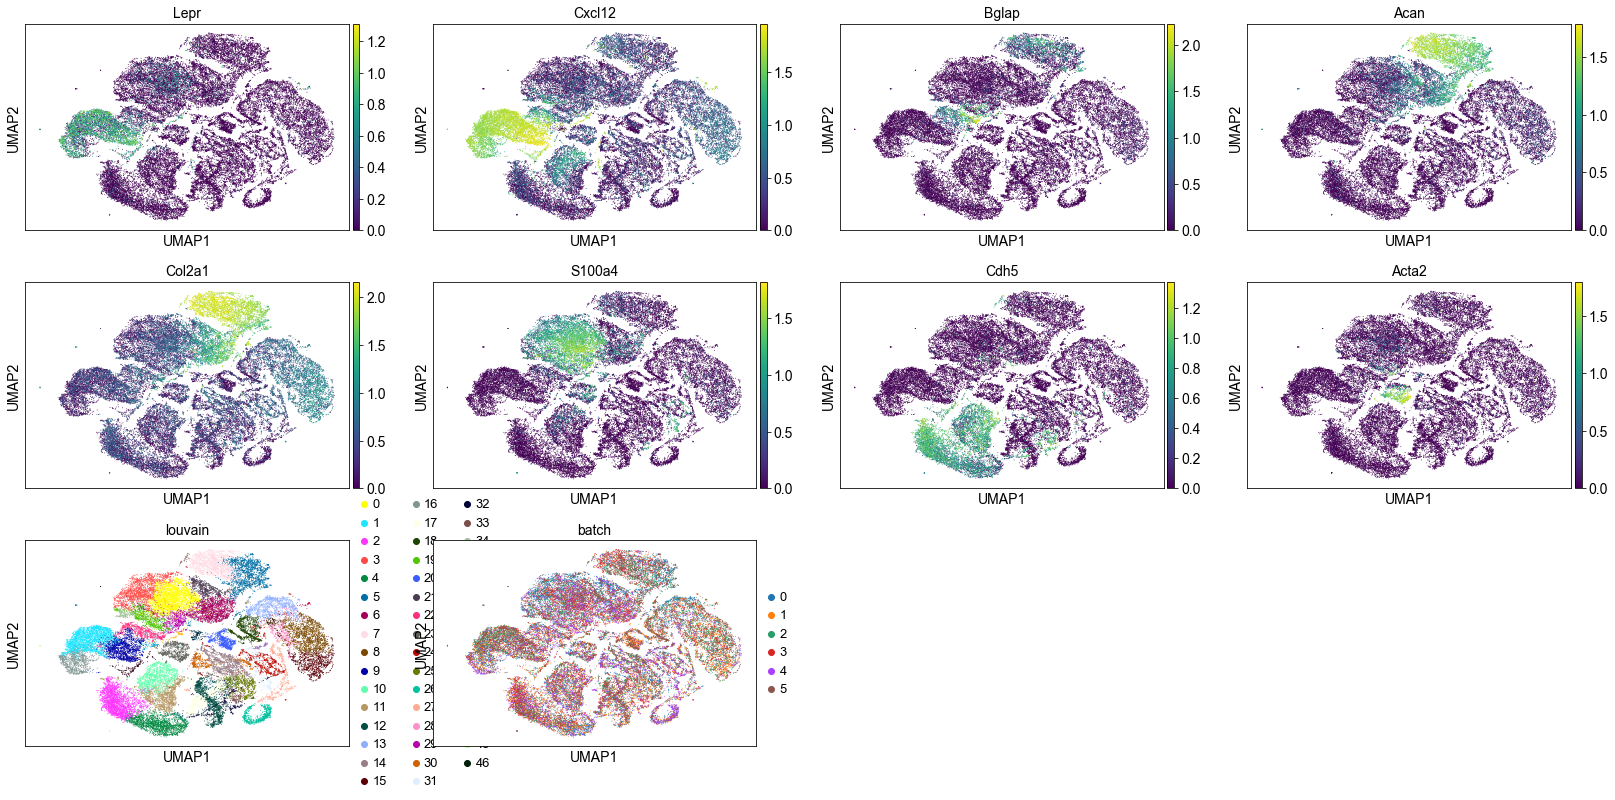

In [37]:
sc.pl.umap(concat_bary, color = ['Lepr', 'Cxcl12','Bglap', 'Acan', 'Col2a1', 'S100a4', 'Cdh5', 'Acta2', 'louvain', 'batch'])

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:05)
--> added 'pos', the PAGA positions (adata.uns['paga'])


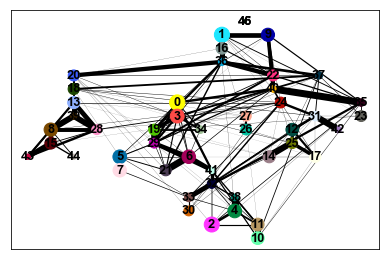

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         1.         1.         0.99978024 0.9996242  0.9994556
     0.9994187  0.9991552  0.9991135  0.9989421  0.9987599  0.9985841
     0.99846125 0.99821025 0.9979914 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:06)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:07:11)


In [38]:
# pseudotime analysis
sc.tl.paga(concat_bary, groups = 'louvain')
sc.pl.paga(concat_bary, layout='rt', root = [1,9]) 

sc.tl.diffmap(concat_bary)
# assign root node
concat_bary.uns['iroot'] = np.flatnonzero(concat_bary.obs['louvain'] == '3')[1]
sc.tl.dpt(concat_bary)

sc.tl.draw_graph(concat_bary)

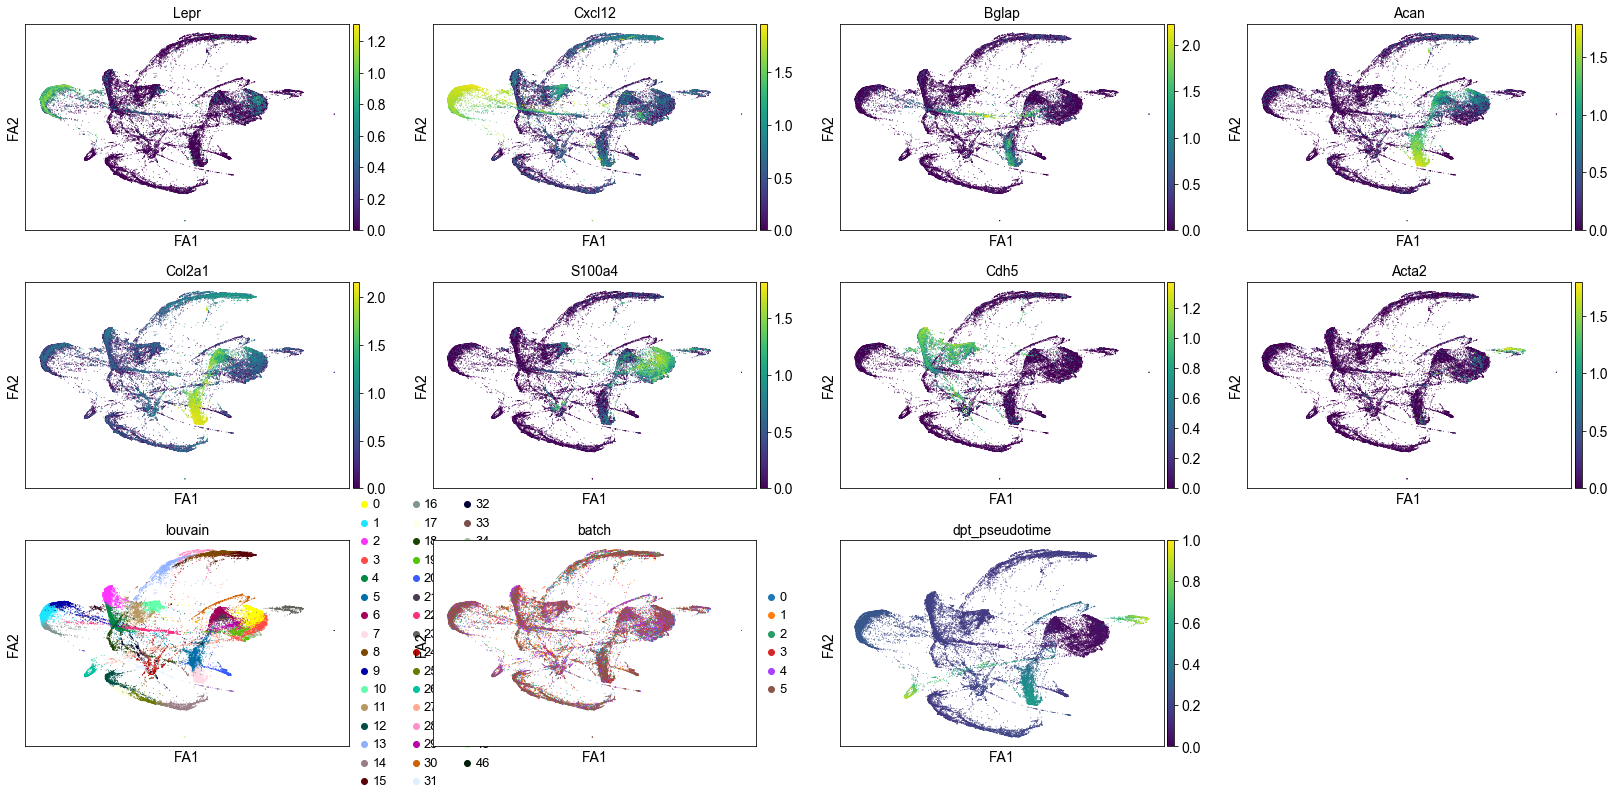

In [40]:
sc.pl.draw_graph(concat_bary, color = ['Lepr', 'Cxcl12','Bglap', 'Acan', 'Col2a1', 'S100a4', 'Cdh5', 'Acta2', 'louvain', 'batch', 'dpt_pseudotime'])

In [41]:
concat_bary.write('/home/hsher/processed_single_cell_data/baryawno.h5ad')

# Wolock 2019, Mapping Distinct Bone Marrow Niche Populations and Their Differentiation Paths

[Scanpy Tutorial](https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html)
[Anndata documentation](https://anndata.readthedocs.io/en/stable/anndata.AnnData.html#anndata.AnnData)

wolock data need to trim off data first 18 col are metadata
`cut -d$'\t' GSE132151_bone_marrow_stroma.counts.tsv -f 1-18 > GSE132151_bone_marrow_stroma.metadata.tsv`
`cut -d$'\t' GSE132151_bone_marrow_stroma.counts.tsv -f 1,19- > GSE132151_bone_marrow_stroma.trimmed.tsv`


In [42]:
def filter_wolock(filename = '/home/hsher/wolock2019_stroma/GSE132151_bone_marrow_stroma.trimmed.tsv', 
                  metadata = '/home/hsher/wolock2019_stroma/GSE132151_bone_marrow_stroma.metadata.tsv', 
                 transcript_per_cell = 500, 
                 mito = 0.2):
    # read single cell expression matrix
    wo = read_raw_counts(filename, ignore_lines = 0, transpose = False)
    
    # join original publidation's metadata (cluster assigned)
    wo_metadata = pd.read_csv(metadata, header = 0, sep = '\t', index_col = 0)
    wo.obs = wo_metadata
    
    # filter cells with no enough transcript in cell
    sc.pp.filter_cells(wo, min_counts = transcript_per_cell)
    
    # benchmarking
    benchmarking(wo, species = 'mouse')
    
    # filter mitochondrial gene
    wo = wo[ wo.obs['percent_mito']<mito ]
    
    # normalize, by excluding frequent gene to avoid distorting data
    sc.pp.normalize_total(wo)
    
    # log1p should come before combating batch effect
    sc.pp.log1p(wo)
    
    return(wo)

In [43]:
wo = filter_wolock()

... reading from cache file cache/home-hsher-wolock2019_stroma-GSE132151_bone_marrow_stroma.trimmed.h5ad
filtered out 8416 cells that haveless than 500 counts
Normalizing counts per cell.
    finished (0:00:00):normalized adata.X


/home/hsher/miniconda3/envs/scanpy/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:285: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(data)


Trying to set attribute `.obs` of view, making a copy.
... storing 'barcode' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'pass_filter' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'cluster' as categorical


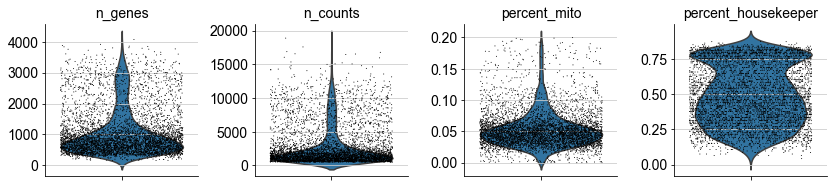

In [4]:
sc.pl.violin(wo, ['n_genes', 'n_counts', 'percent_mito', 'percent_housekeeper'],
             jitter=0.4, multi_panel=True)

In [5]:
def previsualize(concat, species = 'human'):
    '''
    This part should be modulized
    
    '''
    # calling various marker gene from literature
    lineage_calling(concat, species = species)
    
    # set the raw data to log form
    concat.raw = concat

    # set highly variable genes
    sc.pp.highly_variable_genes(concat, min_mean=0.0125, max_mean=3, min_disp=0.5)

    # see if batch effect correction changes the result
    # principle component analysis
    sc.tl.pca(concat, svd_solver='arpack')

    # compute neibors for PC
    sc.pp.neighbors(concat, n_neighbors=4, n_pcs=40) # wolock as slightly different params
    
    # compute umap
    sc.tl.umap(concat) 
    
    # compute louvain cluster
    sc.tl.louvain(concat)
    

    return(concat)
    

In [6]:
previsualize(wo, species = 'mouse')

--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:01.44)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:03.20) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix
computing UMAP
    using 'X_pca' with n_pcs = 40


/home/hsher/miniconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


    finished (0:00:08.62) --> added
    'X_umap', UMAP coordinates (adata.obsm)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.21) --> found 22 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
    adata.uns['iroot'] = root_cell_index
    adata.var['xroot'] = adata[root_cell_name, :].X
computing Diffusion Maps using n_comps=15(=n_dcs)
    eigenvalues of transition matrix
    [1.         1.         0.9996123  0.99952686 0.99910384 0.99867034
     0.9979834  0.99711245 0.9970065  0.9943876  0.99293417 0.9899742
     0.9895798  0.98748493 0.98568845]
    finished (0:00:00.40) --> added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns)
computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:00.01) --> added

    'dpt_groups', the branching subgroups of dpt (adata.obs)
    'dpt_order', cell order (adata.obs)


AnnData object with n_obs × n_vars = 5024 × 25289 
    obs: 'barcode', 'library', 'sample', 'n_genes', 'n_counts', 'mito_frac', 'pass_filter', 'cluster', 'SPRING_x', 'SPRING_y', 'PBA_Potential', 'PBA_Pr_Adipo', 'PBA_Pr_Osteo', 'PBA_Pr_Chondro', 'PBA_Osteo_pseudotime', 'PBA_Chondro_pseudotime', 'PBA_Adipo_pseudotime', 'percent_mito', 'percent_housekeeper', 'B Cell Lineage', 'Basophil Lineage', 'Dendritic Cell Lineage', 'Eosinophil Lineage', 'Erythrocyte Lineage', 'Macrophage Lineage', 'Mast Cell Lineage', 'Megakaryocyte Lineage', 'Multi Potential Progenitor', 'NK Cell Lineage', 'Neutrophil Lineage', 'T Cell Lineage', 'C', 'O1', 'O2', 'O3', 'P1', 'P2', 'P3', 'P4', 'V1', 'V2', 'louvain', 'dpt_groups', 'dpt_order', 'dpt_order_indices'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'louvain', 'diffmap_evals', 'dpt_changepoints', 'dpt_grouptips'
    obsm: 'X_pca', 'X_umap', 'X_diffmap'
    varm: 'PCs'

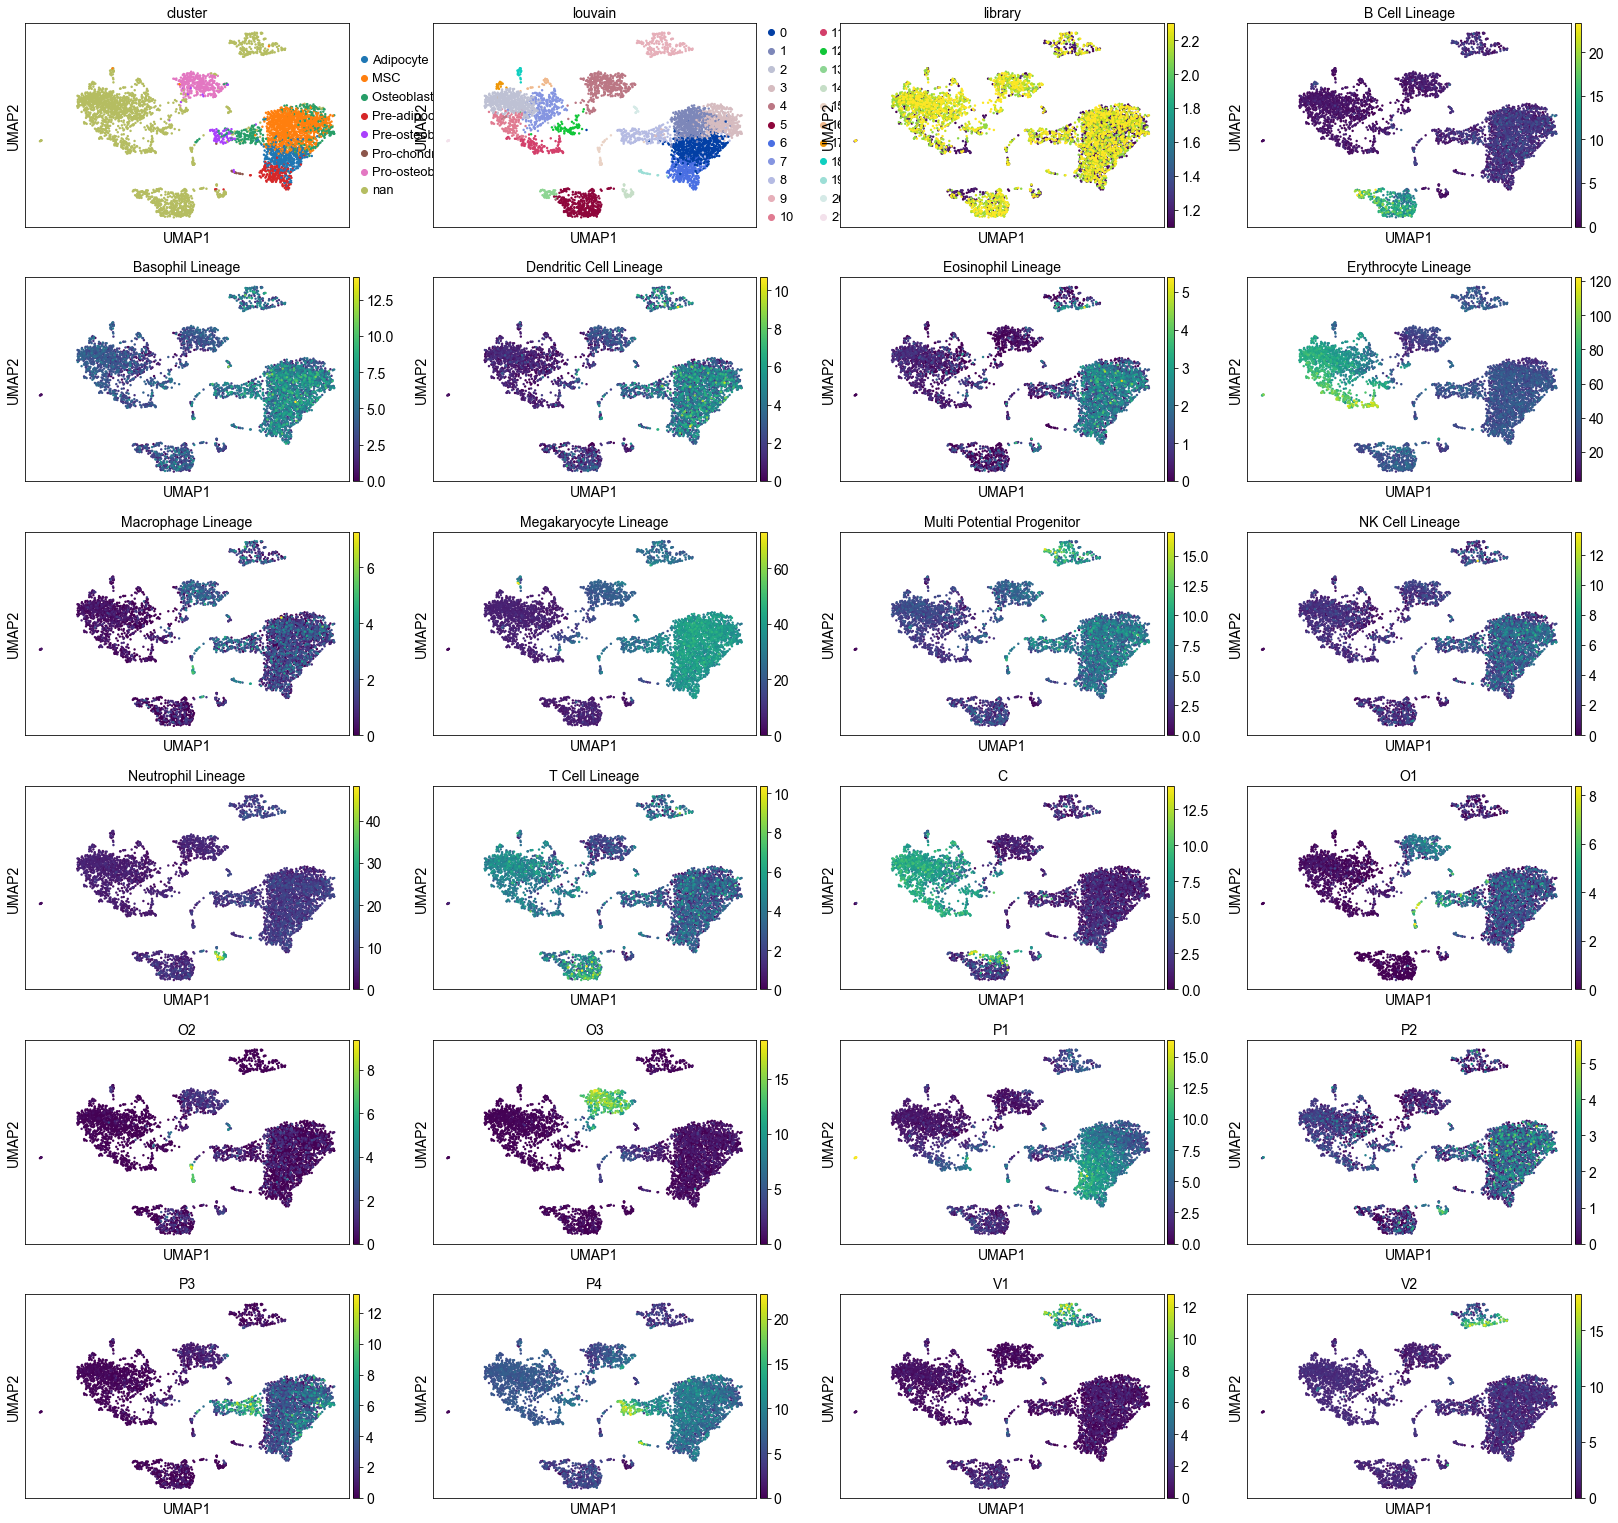

In [7]:
sc.pl.umap(wo, color=['cluster','louvain','library','B Cell Lineage', 'Basophil Lineage', 'Dendritic Cell Lineage',
       'Eosinophil Lineage', 'Erythrocyte Lineage', 'Macrophage Lineage',
       'Megakaryocyte Lineage', 'Multi Potential Progenitor',
       'NK Cell Lineage', 'Neutrophil Lineage', 'T Cell Lineage', 'C', 'O1', 'O2', 'O3', 'P1', 'P2', 'P3', 'P4',
       'V1', 'V2'], use_raw=False)

drawing single-cell graph using layout "fa"
    finished (0:00:40.46) --> added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm)


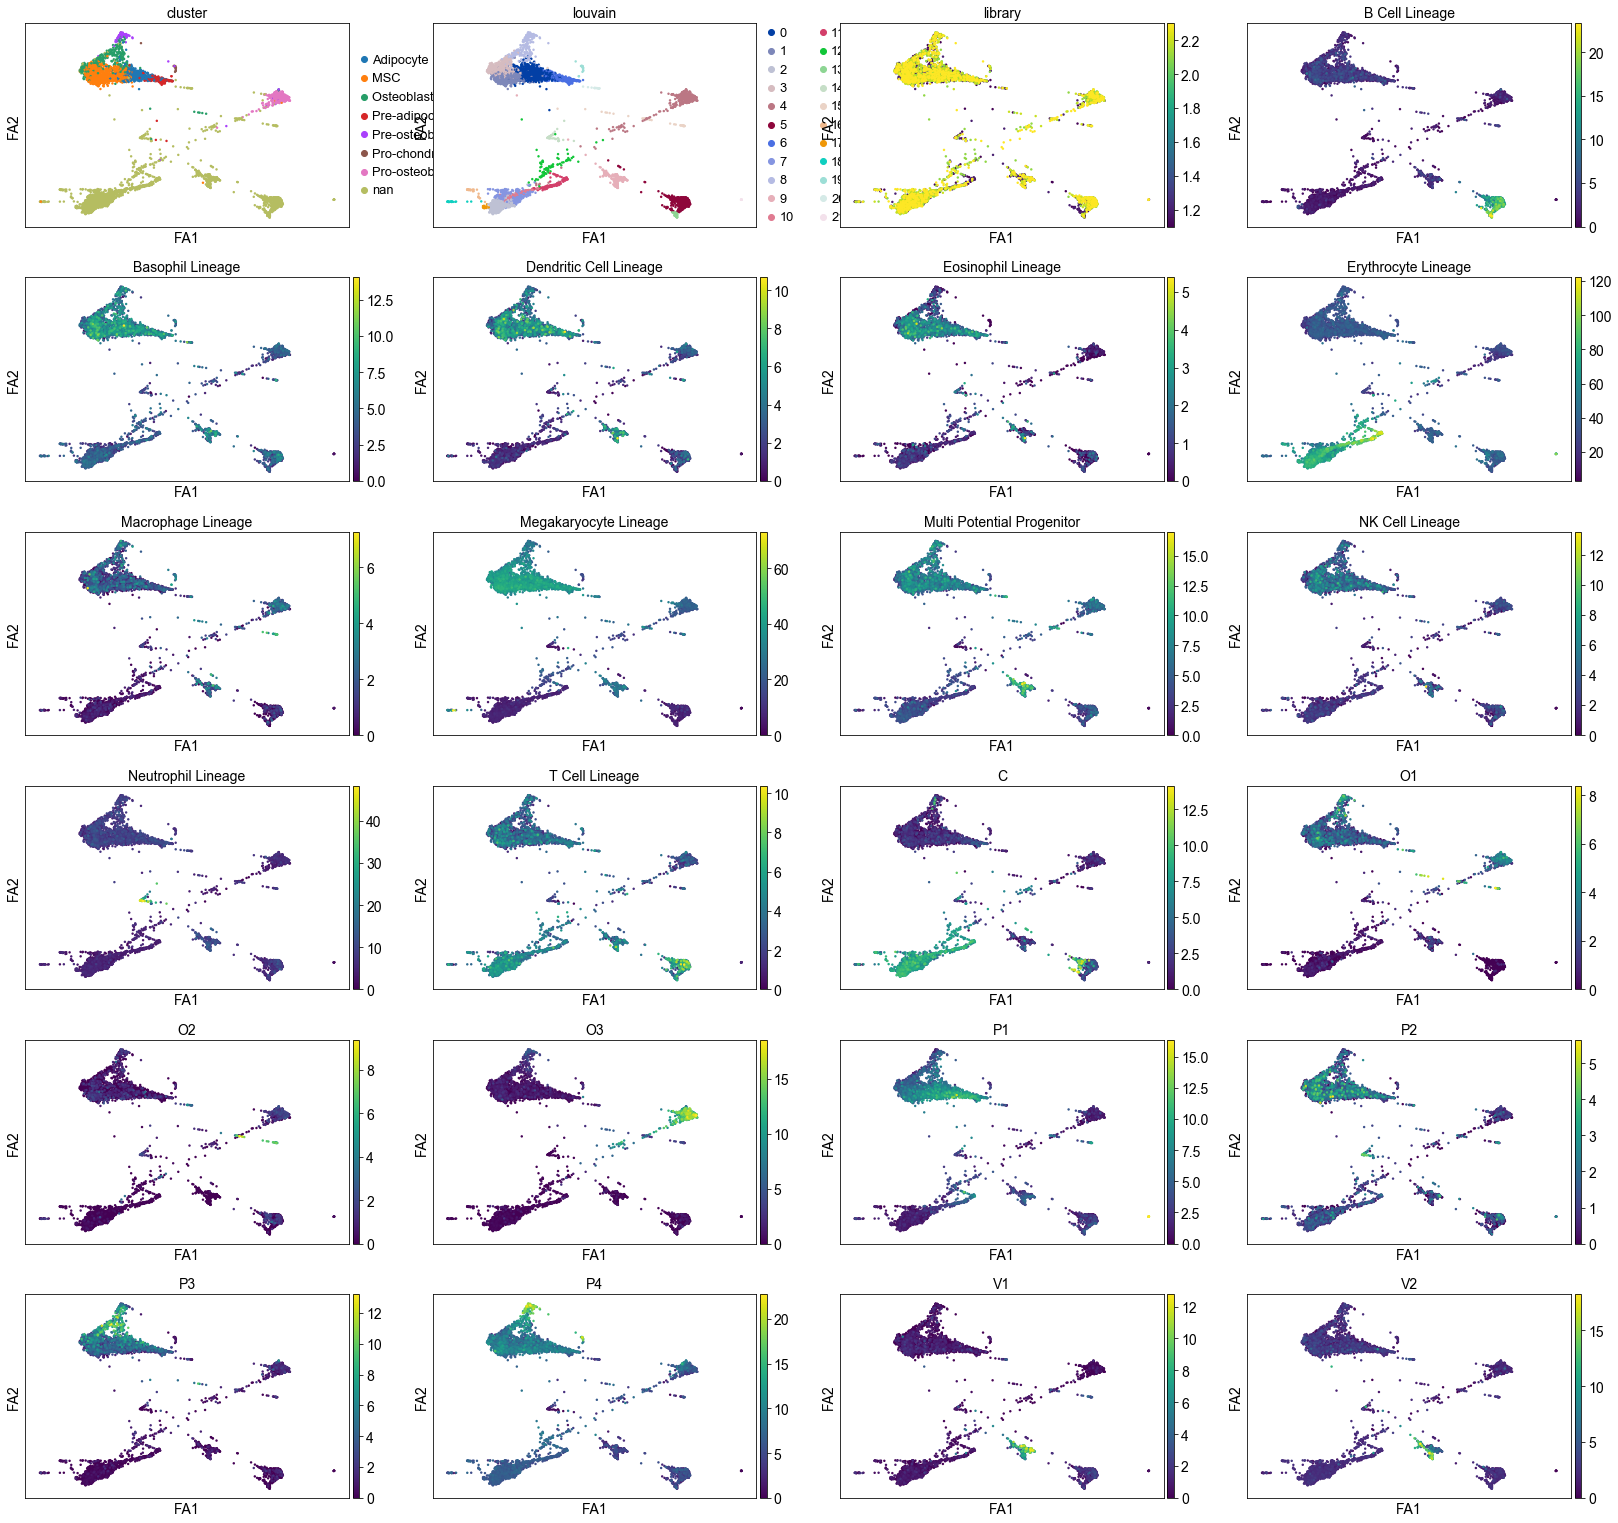

In [8]:
sc.tl.draw_graph(wo)
sc.pl.draw_graph(wo, color=['cluster','louvain','library','B Cell Lineage', 'Basophil Lineage', 'Dendritic Cell Lineage',
       'Eosinophil Lineage', 'Erythrocyte Lineage', 'Macrophage Lineage',
       'Megakaryocyte Lineage', 'Multi Potential Progenitor',
       'NK Cell Lineage', 'Neutrophil Lineage', 'T Cell Lineage', 'C', 'O1', 'O2', 'O3', 'P1', 'P2', 'P3', 'P4',
       'V1', 'V2'], use_raw=False)

In [9]:
wo.write('/home/hsher/processed_single_cell_data/wolock.h5ad')

# Single cell transcriptome profiling of the bone marrow niche at steady state and under stress conditions, nature 2019

In [10]:
def filter_tikhonova(filename,  
                 transcript_per_cell = 1000, 
                 mito = 0.1):
    # read single cell expression matrix
    base = '/home/hsher/nature2019_mice_niche/'
    wo = read_raw_counts(base+filename, ignore_lines = 0, transpose = True)
    
        
    # filter cells with no enough transcript in cell
    sc.pp.filter_cells(wo, min_counts = transcript_per_cell)
    
    # benchmarking
    benchmarking(wo, species = 'mouse')
    
    # filter mitochondrial gene
    wo = wo[ wo.obs['percent_mito']<mito ]
    
    # normalize, by excluding frequent gene to avoid distorting data
    sc.pp.normalize_total(wo)
    
    # log1p should come before combating batch effect
    sc.pp.log1p(wo)
    
    return(wo)

In [11]:
sample_three = listdir('/home/hsher/nature2019_mice_niche/') # mice stroma data nature 2019

In [12]:
sample_three.remove('GSE123078_RAW.tar')

In [13]:
sample_three

['GSM3494770_vecad-5fu.counts.raw.txt',
 'GSM3494771_vecad-ctrl.counts.raw.txt',
 'GSM3494768_lepr-5fu.counts.raw.txt',
 'GSM3494769_lepr-ctrl.counts.raw.txt']

Only considering the two last: ['.raw', '.txt'].
Only considering the two last: ['.raw', '.txt'].
... reading from cache file cache/home-hsher-nature2019_mice_niche-GSM3494770_vecad-5fu.counts.raw.h5ad
GSM3494770_vecad-5fu.counts.raw.txt


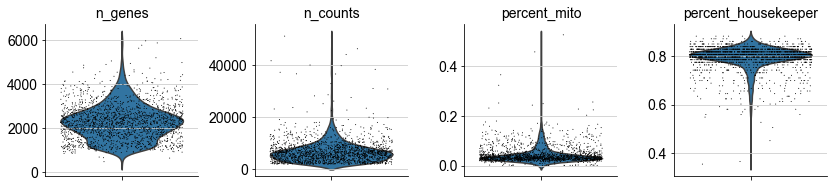

Only considering the two last: ['.raw', '.txt'].
Only considering the two last: ['.raw', '.txt'].
... reading from cache file cache/home-hsher-nature2019_mice_niche-GSM3494771_vecad-ctrl.counts.raw.h5ad
GSM3494771_vecad-ctrl.counts.raw.txt


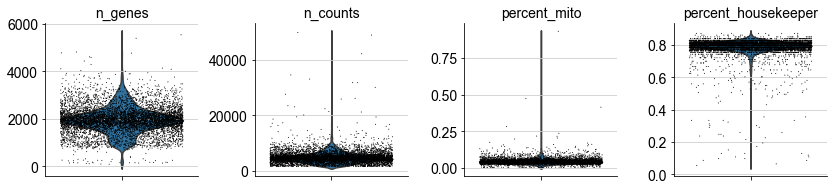

Only considering the two last: ['.raw', '.txt'].
Only considering the two last: ['.raw', '.txt'].
... reading from cache file cache/home-hsher-nature2019_mice_niche-GSM3494768_lepr-5fu.counts.raw.h5ad
GSM3494768_lepr-5fu.counts.raw.txt


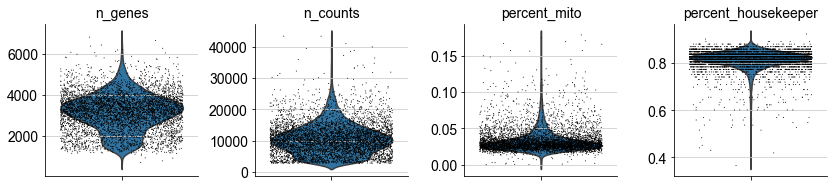

Only considering the two last: ['.raw', '.txt'].
Only considering the two last: ['.raw', '.txt'].
... reading from cache file cache/home-hsher-nature2019_mice_niche-GSM3494769_lepr-ctrl.counts.raw.h5ad
GSM3494769_lepr-ctrl.counts.raw.txt


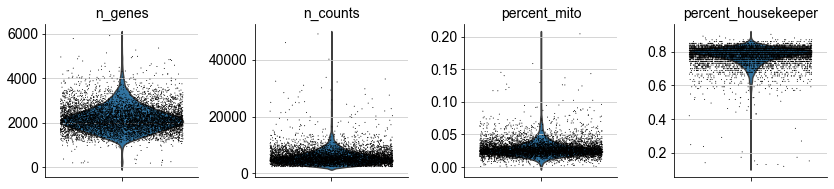

In [14]:
for s in sample_three:
    # run benchmarking
    d = read_raw_counts('/home/hsher/nature2019_mice_niche/'+s, ignore_lines = 0, transpose = True)
    benchmarking(d, species = 'mouse')
    
    # see benchmarking result
    print(s)
    sc.pl.violin(d, ['n_genes', 'n_counts', 'percent_mito', 'percent_housekeeper'], jitter=0.4, multi_panel=True)

In [15]:
lepr = filter_tikhonova('GSM3494769_lepr-ctrl.counts.raw.txt')
vecad = filter_tikhonova('GSM3494771_vecad-ctrl.counts.raw.txt')
lepr.obs['cluster']='lepr'
vecad.obs['cluster']='vecad'

Only considering the two last: ['.raw', '.txt'].
Only considering the two last: ['.raw', '.txt'].
... reading from cache file cache/home-hsher-nature2019_mice_niche-GSM3494769_lepr-ctrl.counts.raw.h5ad
Only considering the two last: ['.raw', '.txt'].
Only considering the two last: ['.raw', '.txt'].
... reading from cache file cache/home-hsher-nature2019_mice_niche-GSM3494771_vecad-ctrl.counts.raw.h5ad


Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.


In [16]:
# concat them
concat_three = lepr.concatenate(vecad)

In [17]:
previsualize(concat_three, species = 'mouse')

--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:00.63)
computing neighbors
    using 'X_pca' with n_pcs = 40


/home/hsher/miniconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../miniconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/home/hsher/miniconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../miniconda3/lib/python3.7/site-packages/umap/utils.py", line 409:
@num

    finished (0:00:06.62) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix
computing UMAP
    using 'X_pca' with n_pcs = 40


/home/hsher/miniconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 6 separate connected components using meta-embedding (experimental)
  n_components


    finished (0:00:07.57) --> added
    'X_umap', UMAP coordinates (adata.obsm)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.65) --> found 26 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
    adata.uns['iroot'] = root_cell_index
    adata.var['xroot'] = adata[root_cell_name, :].X
computing Diffusion Maps using n_comps=15(=n_dcs)
    eigenvalues of transition matrix
    [1.         1.         1.         1.         0.9999483  0.9993392
     0.9984352  0.99820316 0.9975693  0.99688995 0.9956324  0.994982
     0.992606   0.9924817  0.99207044]
    finished (0:00:01.01) --> added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns)
computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:00.02) --> added

    'dpt_groups', the branching subgroups of dpt (adata.obs)
    'dpt_order', cell order (adata.obs)


AnnData object with n_obs × n_vars = 12951 × 13910 
    obs: 'batch', 'cluster', 'n_counts', 'n_genes', 'percent_housekeeper', 'percent_mito', 'B Cell Lineage', 'Basophil Lineage', 'Dendritic Cell Lineage', 'Eosinophil Lineage', 'Erythrocyte Lineage', 'Macrophage Lineage', 'Mast Cell Lineage', 'Megakaryocyte Lineage', 'Multi Potential Progenitor', 'NK Cell Lineage', 'Neutrophil Lineage', 'T Cell Lineage', 'C', 'O1', 'O2', 'O3', 'P1', 'P2', 'P3', 'P4', 'V1', 'V2', 'louvain', 'dpt_groups', 'dpt_order', 'dpt_order_indices'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'louvain', 'diffmap_evals', 'dpt_changepoints', 'dpt_grouptips'
    obsm: 'X_pca', 'X_umap', 'X_diffmap'
    varm: 'PCs'

... storing 'cluster' as categorical


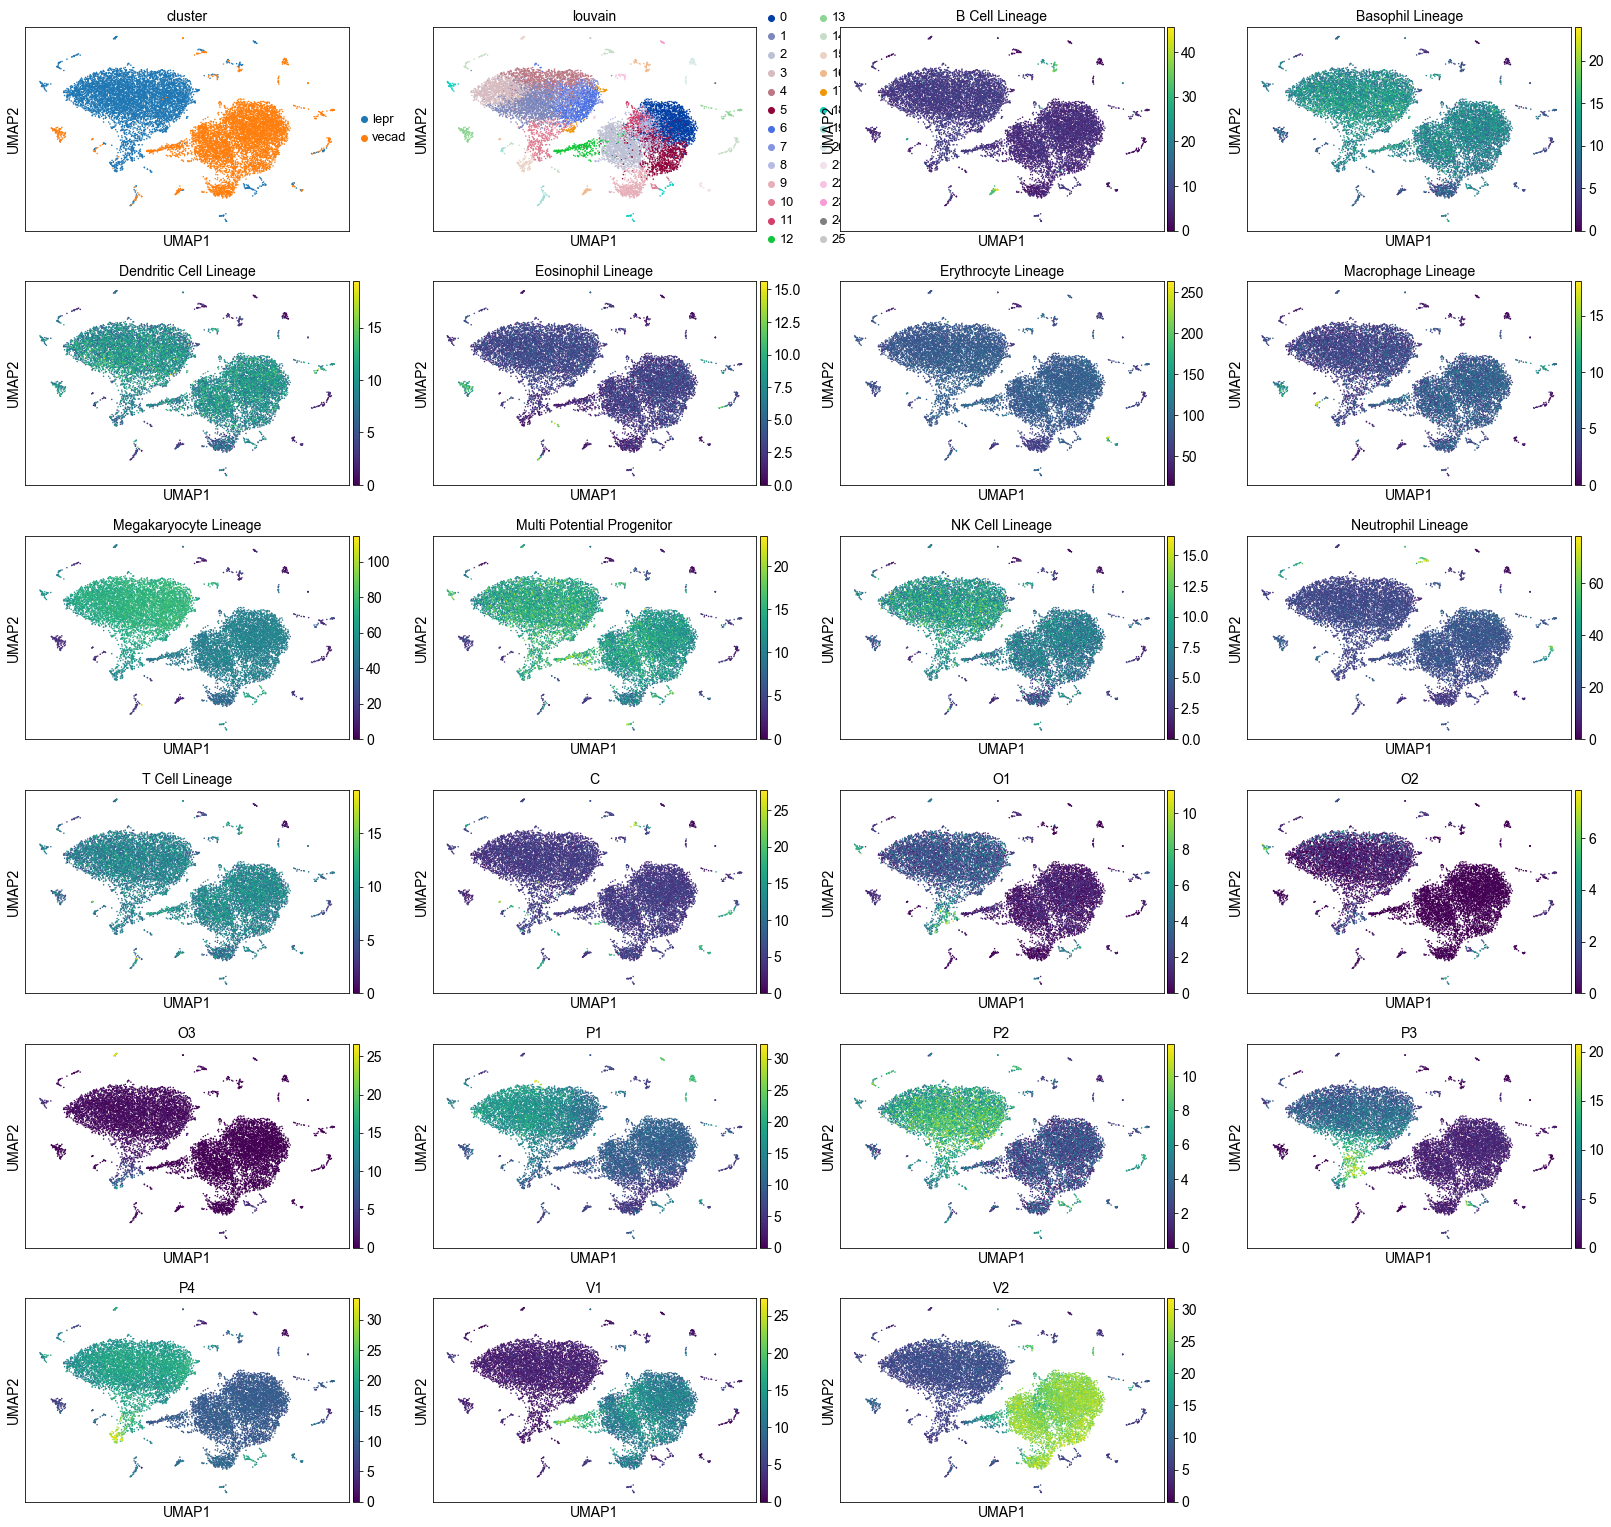

In [18]:
sc.pl.umap(concat_three, color=['cluster','louvain','B Cell Lineage', 'Basophil Lineage', 'Dendritic Cell Lineage',
       'Eosinophil Lineage', 'Erythrocyte Lineage', 'Macrophage Lineage',
       'Megakaryocyte Lineage', 'Multi Potential Progenitor',
       'NK Cell Lineage', 'Neutrophil Lineage', 'T Cell Lineage', 'C', 'O1', 'O2', 'O3', 'P1', 'P2', 'P3', 'P4',
       'V1', 'V2'], use_raw=False)

In [19]:
concat_three.write('/home/hsher/processed_single_cell_data/tikhonova.h5ad')